In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Setting up Logging and Loading the Dataset

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(r'.\data\pima_indians_diabetes.log'), # Log to a file
        logging.StreamHandler() # Log to console
    ]
)
def validate_file_path(file_path: str) -> str:
    """
    Validates if a file exists. Prompts the user until a valid file path is provided or exits the program.
    """
    while not os.path.exists(file_path):
        logging.warning(f'file {file_path} does not exist.')
        file_path = input(prompt='Pleas enter a valid file path or type q to quit: ').strip()
        if file_path.lower() == 'q':
            logging.info("User chose to exit the program.")
            exit(0) # This will exit the program with a success status code
    logging.info(f'file {file_path} found successfully.')
    return file_path


def read_data(file_path: str, column_names: list[str]) -> pd.DataFrame:
    """
    Reads a CSV file into a pandas DataFrame.

    Args:
        file_path (str): Path to the CSV file.
        column_names (list[str]): List of column names for the DataFrame.

    Returns:
        pd.DataFrame: DataFrame containing the data.
    """
    file_path = validate_file_path(file_path)
    try:
        logging.info(f"Attempting to load file '{file_path}'.")
        df = pd.read_csv(
            filepath_or_buffer=file_path, 
            names=column_names, 
            header=0, 
            encoding='utf-8', 
            sep=','
        )
        logging.info("File loaded successfully.")
        logging.info(f"First 5 rows of the dataset:\n{df.head()}")
        return df
    except pd.errors.EmptyDataError:
        logging.error('Error: the file is empty.')
        exit(1) # This will exit the program with an error status code
    except pd.errors.ParserError:
        logging.error('Error: The file could not be parsed. Ensure it is a valid CSV file.')
        exit(1) # This will exit the program with an error status code
    except Exception as e:
        logging.exception(f'Unexpected error occurred: {e}')
        exit(1) # This will exit the program with an error status code
if __name__ == '__main__':
    data_file = r'.\data\pima_indians_diabetes.csv'
    columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
    df = read_data(file_path=data_file, column_names=columns)


2024-11-27 17:02:16,208 - INFO - file .\data\pima_indians_diabetes.csv found successfully.
2024-11-27 17:02:16,210 - INFO - Attempting to load file '.\data\pima_indians_diabetes.csv'.


2024-11-27 17:02:16,237 - INFO - File loaded successfully.
2024-11-27 17:02:16,242 - INFO - First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
"""
DiabetesPedigreeFunction: The Diabetes Pedigree Function (DPF) a numerical score to assess the genetic risk of developing diabetes based on family history.
abbreviations:
    Pregnancies: Preg
    Glucose: Glu
    BloodPressure: BP
    SkinThickness: ST
    Insulin: Ins
    BMI (Body Mass Index): BMI
    Diabetes Pedigree Function: DPF
    Age: Age
    Outcome: Out
    """

In [6]:
# Viewing the First Few Rows of the Dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Checking Dataset Shape

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 768 rows and 9 columns.


In [8]:
# Summarizing column data types and missing values

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [9]:
# Summarizing missing values

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Statistical Summary

df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
5%,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Replacing for Zero Values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    print(f'{col}: {df[col].loc[df[col] == 0].count()} zeros')
    df.replace(to_replace={col: 0}, value=np.nan, inplace=True)

Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [12]:
# # Checking for Zero Values after replacement

for col in columns_with_zeros:
    if df[col].loc[df[col] == 0].count() > 0:
        print(f'{col}: {df[col].loc[df[col] == 0].count()} zeros')
    else:
        print(f'{col}: No zeros')

Glucose: No zeros
BloodPressure: No zeros
SkinThickness: No zeros
Insulin: No zeros
BMI: No zeros


In [13]:
# Checking for Missing

for col in columns_with_zeros:
    print(f'{col}: {df[col].isnull().sum()} missing values') 

Glucose: 5 missing values
BloodPressure: 35 missing values
SkinThickness: 227 missing values
Insulin: 374 missing values
BMI: 11 missing values


In [14]:
#  Percentages of Missing Values

missing_percentage = df.isnull().sum() / len(df) * 100
non_missing_percentage = 100 - missing_percentage

missing_data = pd.DataFrame(data={
    'Missing %': missing_percentage,
    'Non Missing %': non_missing_percentage
})
missing_data.head(len(missing_data)).style.background_gradient(cmap='Pastel1').format(precision=1)


,Missing %,Non Missing %
Pregnancies,0.0,100.0
Glucose,0.7,99.3
BloodPressure,4.6,95.4
SkinThickness,29.6,70.4
Insulin,48.7,51.3
BMI,1.4,98.6
DiabetesPedigreeFunction,0.0,100.0
Age,0.0,100.0
Outcome,0.0,100.0


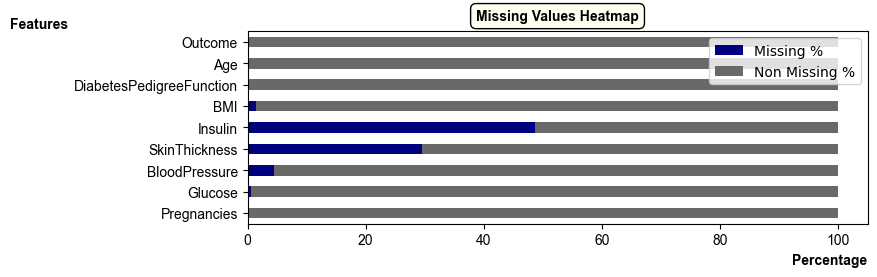

In [15]:
#  Visualizing Missing Values

missing_data.plot(kind='barh', stacked=True, figsize=(8, 2.5), fontsize=10, color=['navy', 'dimgrey'])

plt.title(label="Missing Values Heatmap", fontdict={'fontweight': 'bold', 'fontsize': 10, 'font': 'Arial', 'color': 'black'}, loc='center', pad=8, 
          bbox=dict(facecolor='ivory', edgecolor='black', boxstyle='round, pad=0.4'))
plt.xlabel(xlabel='Percentage', loc='right', fontsize=10, fontweight='bold', color='black', font='Arial')
plt.ylabel(ylabel='Features', loc='top', fontsize=10, fontweight='bold', color='black', font='Arial', rotation=0)
plt.xticks(fontsize=10, fontweight='bold', color='black', font='Arial')
plt.yticks(fontsize=10, fontweight='bold', color='black', font='Arial')
plt.legend()
plt.show()

In [16]:
# Handling Missing Values
# Imputing with Mean

for col in columns_with_zeros:
    df[col] = df[col].replace(to_replace=np.nan, value=df[col].mean())

In [17]:
# Checking for Missing

for col in columns_with_zeros:
    print(f'{col}: {df[col].isnull().sum()} missing values') 

Glucose: 0 missing values
BloodPressure: 0 missing values
SkinThickness: 0 missing values
Insulin: 0 missing values
BMI: 0 missing values


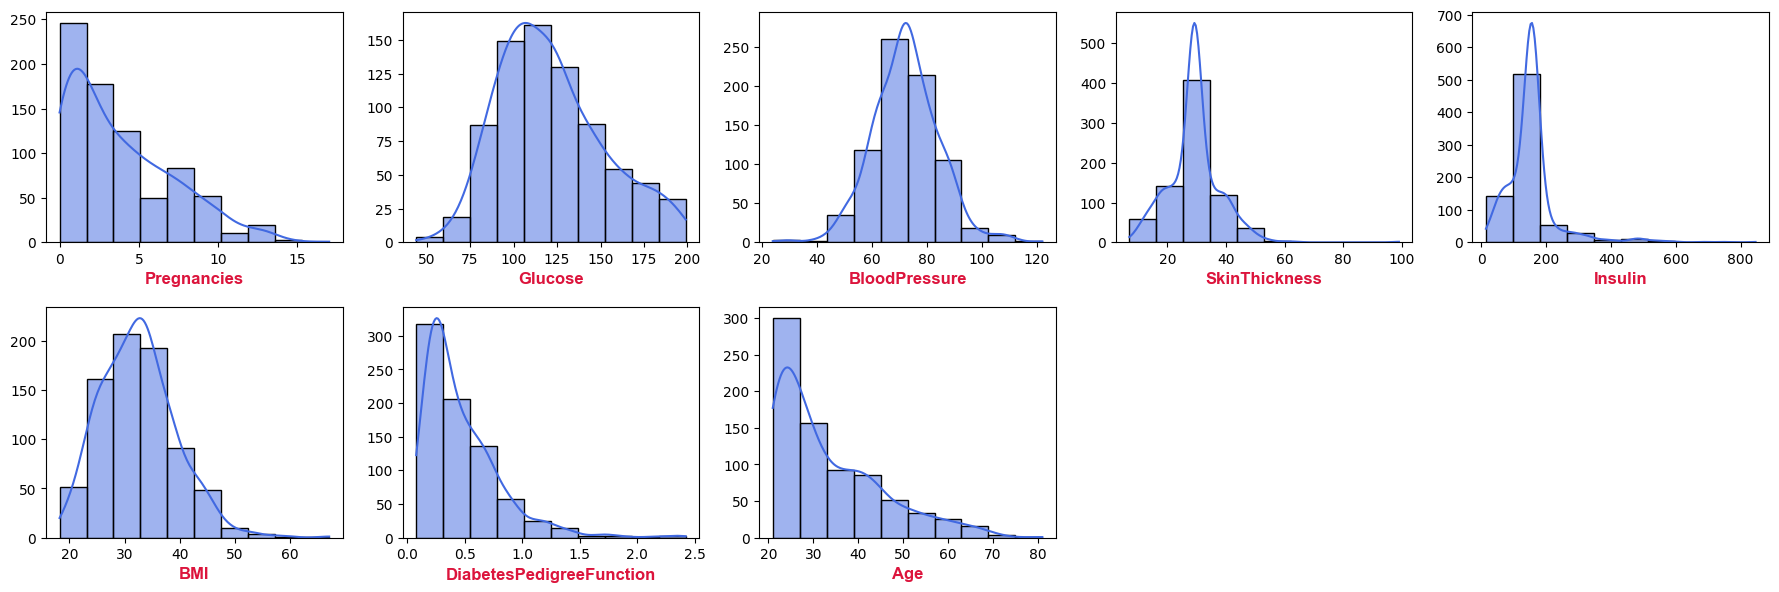

In [18]:
# Univariate Analysis
# Distribution of Numerical Features (Using histograms Plot and KDE (Kernel Density Estimation) Line)

nrows= 2
ncols = 5

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6))
axes = ax.flatten()
for i in range(len(df.columns[:-1])):
    sns.histplot(data=df[df.columns[:-1][i]], 
                    bins=10, 
                    kde=True, 
                    color='royalblue', 
                    edgecolor='black', 
                    ax=axes[i]
                    )
    axes[i].set_xlabel(df.columns[i], fontsize=12, fontweight='bold', color='crimson', font='Arial')
    axes[i].set_ylabel(None)
plt.tight_layout()

for j in range(len(df.columns[:-1]), len(axes)):
    fig.delaxes(axes[j])
plt.show()

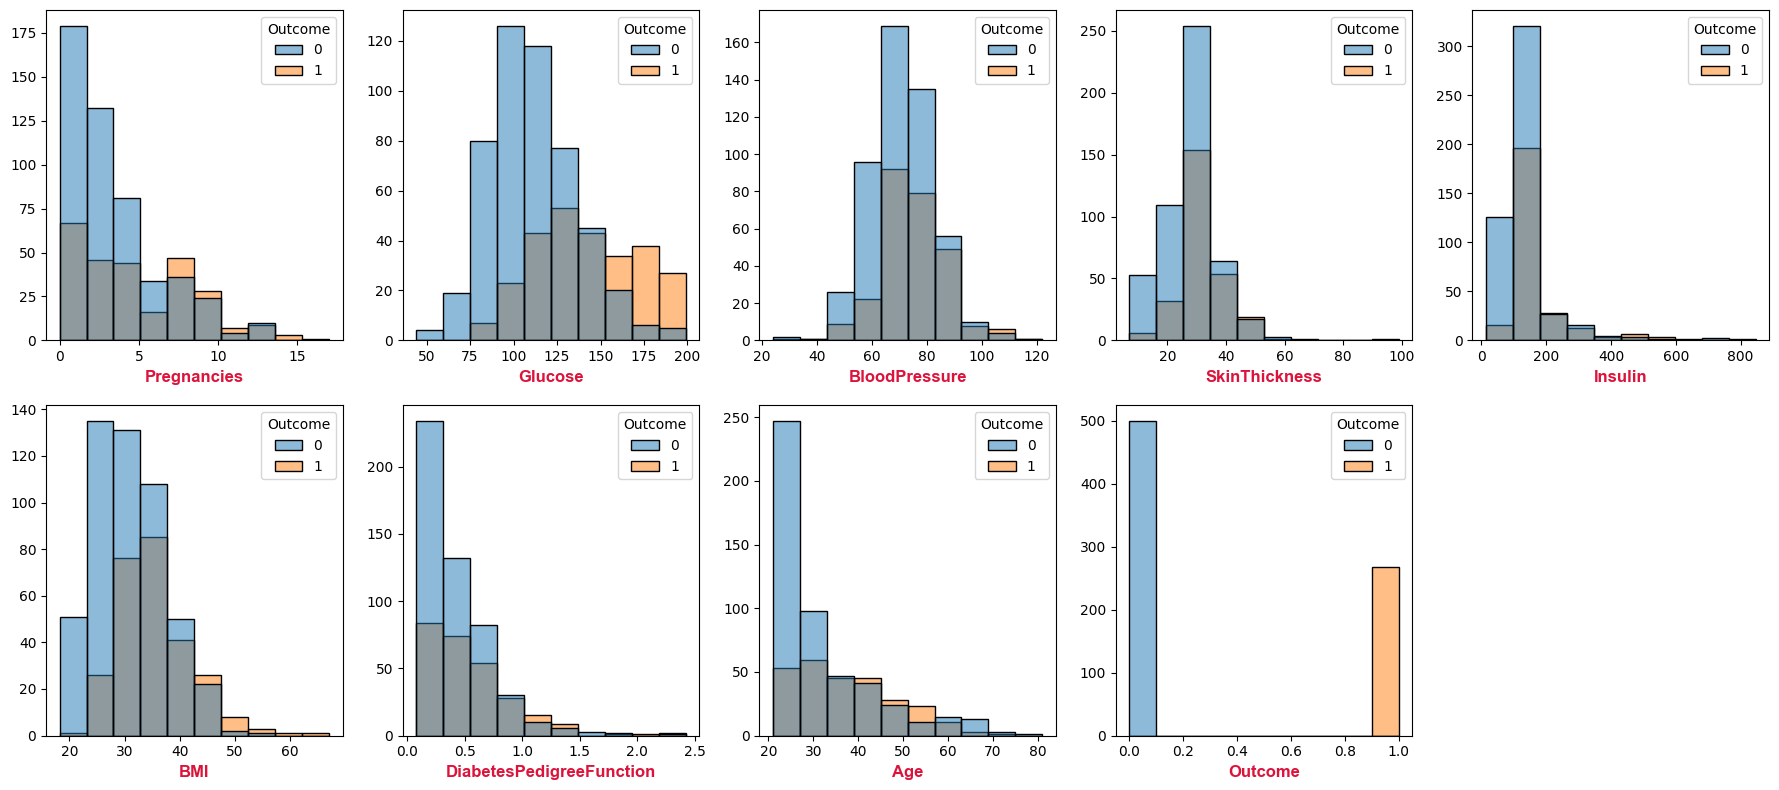

In [19]:
# Distribution of Numerical Features based on the Outcome.

nrows = 2
ncols = 5

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 8))
axes = ax.flatten()
for i in range(len(df.columns)):
    sns.histplot(data=df,
                x=df.columns[i],
                hue='Outcome',
                bins=10,
                edgecolor='black',
                ax=axes[i])
    axes[i].set_xlabel(df.columns[i], fontsize=12, fontweight='bold', color='crimson', font='Arial')
    axes[i].set_ylabel(None)
plt.tight_layout()

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])
plt.show()



In [20]:
# Bivariate Analysis
# Correlation Heatmap

correlation_matrix = df.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.21,0.08,0.06,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.22,0.19,0.42,0.23,0.14,0.27,0.49
BloodPressure,0.21,0.22,1.00,0.19,0.07,0.28,-0.00,0.32,0.17
SkinThickness,0.08,0.19,0.19,1.00,0.16,0.54,0.10,0.13,0.22
Insulin,0.06,0.42,0.07,0.16,1.00,0.17,0.10,0.14,0.21
BMI,0.02,0.23,0.28,0.54,0.17,1.00,0.15,0.03,0.31
DiabetesPedigreeFunction,-0.03,0.14,-0.00,0.10,0.10,0.15,1.00,0.03,0.17
Age,0.54,0.27,0.32,0.13,0.14,0.03,0.03,1.00,0.24
Outcome,0.22,0.49,0.17,0.22,0.21,0.31,0.17,0.24,1.00


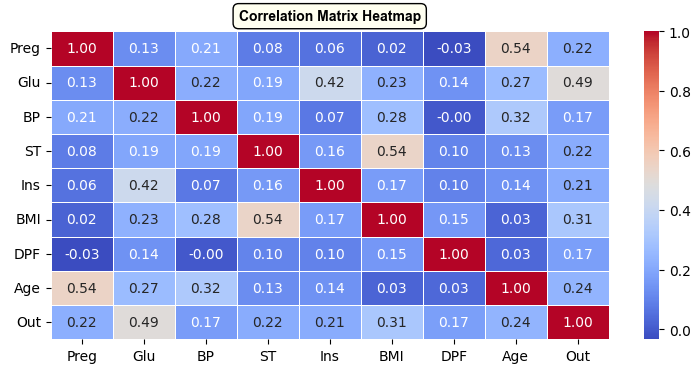

In [21]:
column_names_dic = {
        'Pregnancies': 'Preg',
        'Glucose': 'Glu',
        'BloodPressure': 'BP',
        'SkinThickness': 'ST',
        'Insulin': 'Ins',
        'BMI': 'BMI',
        'DiabetesPedigreeFunction': 'DPF',
        'Age': 'Age',
        'Outcome': 'Out'
        }
df_renamed = df.rename(columns=column_names_dic)
plt.figure(figsize=(9, 4))

sns.heatmap(data=df_renamed.corr(), cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f')

plt.title('Correlation Matrix Heatmap', fontdict={'fontweight': 'bold', 'fontsize': 10, 'font': 'Arial', 'color': 'black'}, loc='center', pad=8, 
          bbox=dict(facecolor='ivory', edgecolor='black', boxstyle='round, pad=0.4'))
plt.yticks(rotation=0)

plt.show()

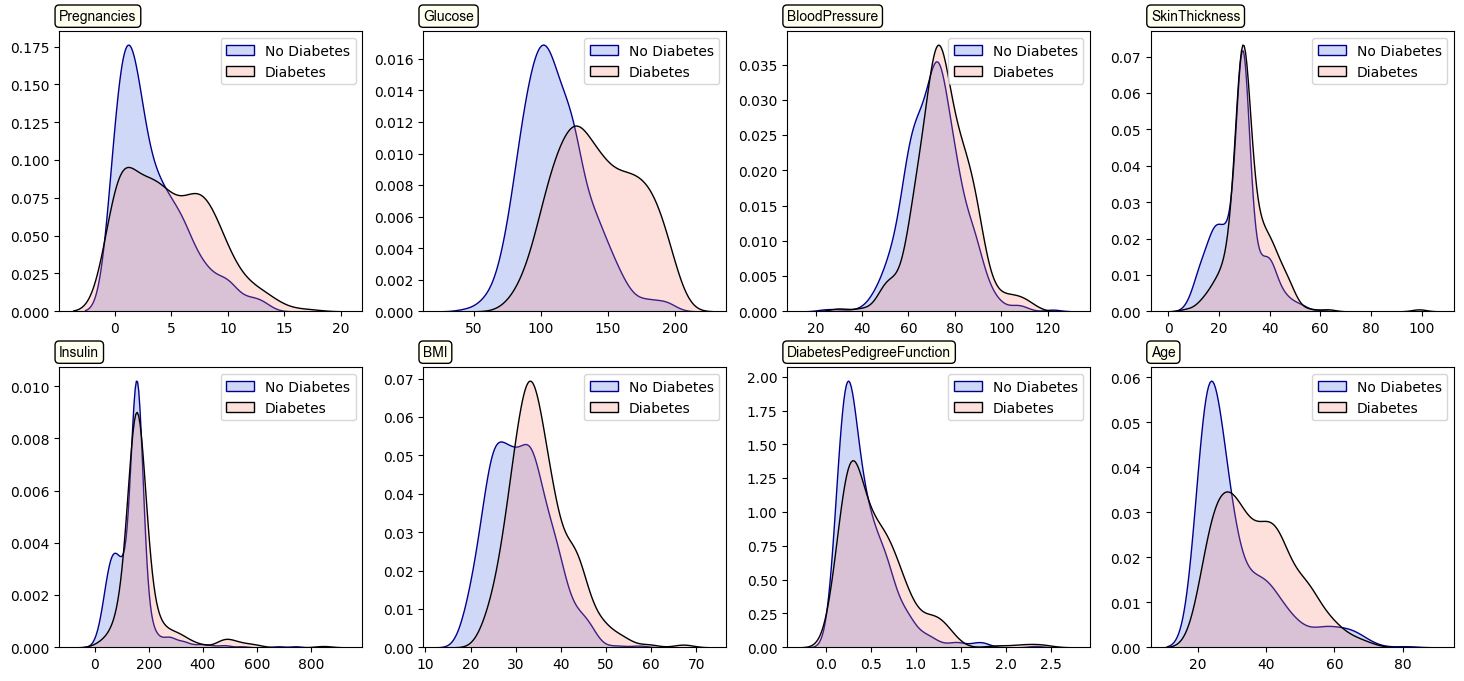

In [22]:
nrows = 2
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 8))
axes = ax.flatten()

for i , col in enumerate(df.columns[:-1]):
    sns.kdeplot(data=df[df['Outcome'] == 0], 
                x=col, 
                fill=True, 
                color='royalblue', 
                edgecolor='darkblue', 
                label= 'No Diabetes',
                ax=axes[i]
                )
    sns.kdeplot(data=df[df['Outcome'] == 1], 
                x=col,
                fill=True, 
                color='salmon', 
                edgecolor='black',
                label= 'Diabetes',
                ax=axes[i]
                )
    axes[i].set_title(col, fontsize=12, fontweight='bold', color='black', font='Arial', loc='left', pad=8,
                        bbox=dict(facecolor='ivory', edgecolor='black', boxstyle='round'))
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].legend()
    
plt.show()




   Age Age_Group
0   50     40-60
1   31      0-40
2   32      0-40
3   21      0-40
4   33      0-40


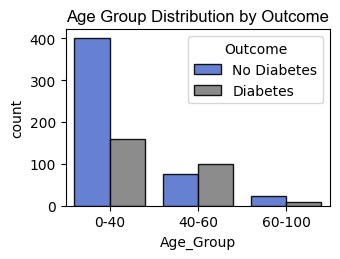

In [ ]:
# Feature Engineering: Create Age Groups

df['Age_Group'] = pd.cut(
    x=df['Age'], 
    bins=[0, 40, 60, 100], 
    labels=['0-40', '40-60', '60-100'],
    right=True
)

# Display sample
print(df[['Age', 'Age_Group']].head())



plt.figure(figsize=(3.5, 2.7))
sns.countplot(data=df, x='Age_Group', hue='Outcome', saturation= 0.75, edgecolor='black', alpha=0.9, palette=['royalblue', 'gray'])

plt.title('Outcome Distribution by Age Group', fontdict={'fontweight': 'bold', 'fontsize': 11, 'font': 'Arial', 'color': 'black'}, loc='center', pad=8)
plt.title("Age Group Distribution by Outcome")

plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()



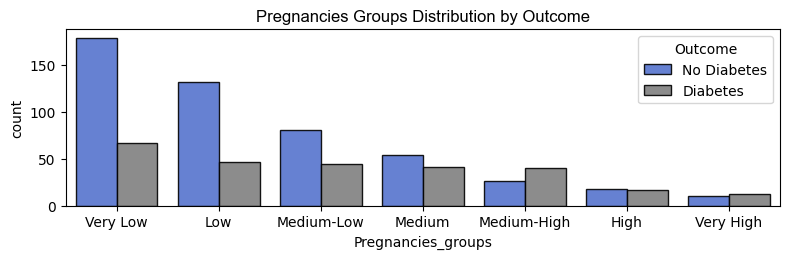

In [24]:
# Feature Engineering: Create Pregnancies Groups

df['Pregnancies_groups'] = pd.cut(
    x=df['Pregnancies'],
    bins=[0, 2, 4, 6, 8, 10, 12, 17],
    labels=['Very Low', 'Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very High'],
    right=False
    )

plt.figure(figsize=(8, 2.7))
sns.countplot(data=df, x='Pregnancies_groups', hue='Outcome', saturation= 0.75, edgecolor='black', alpha=0.9, palette=['royalblue', 'gray'])

plt.title('Outcome Distribution by Pregnancies Groups', fontdict={'fontweight': 'bold', 'fontsize': 11, 'font': 'Arial', 'color': 'black'}, loc='center', pad=8)
plt.title("Pregnancies Groups Distribution by Outcome")

plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

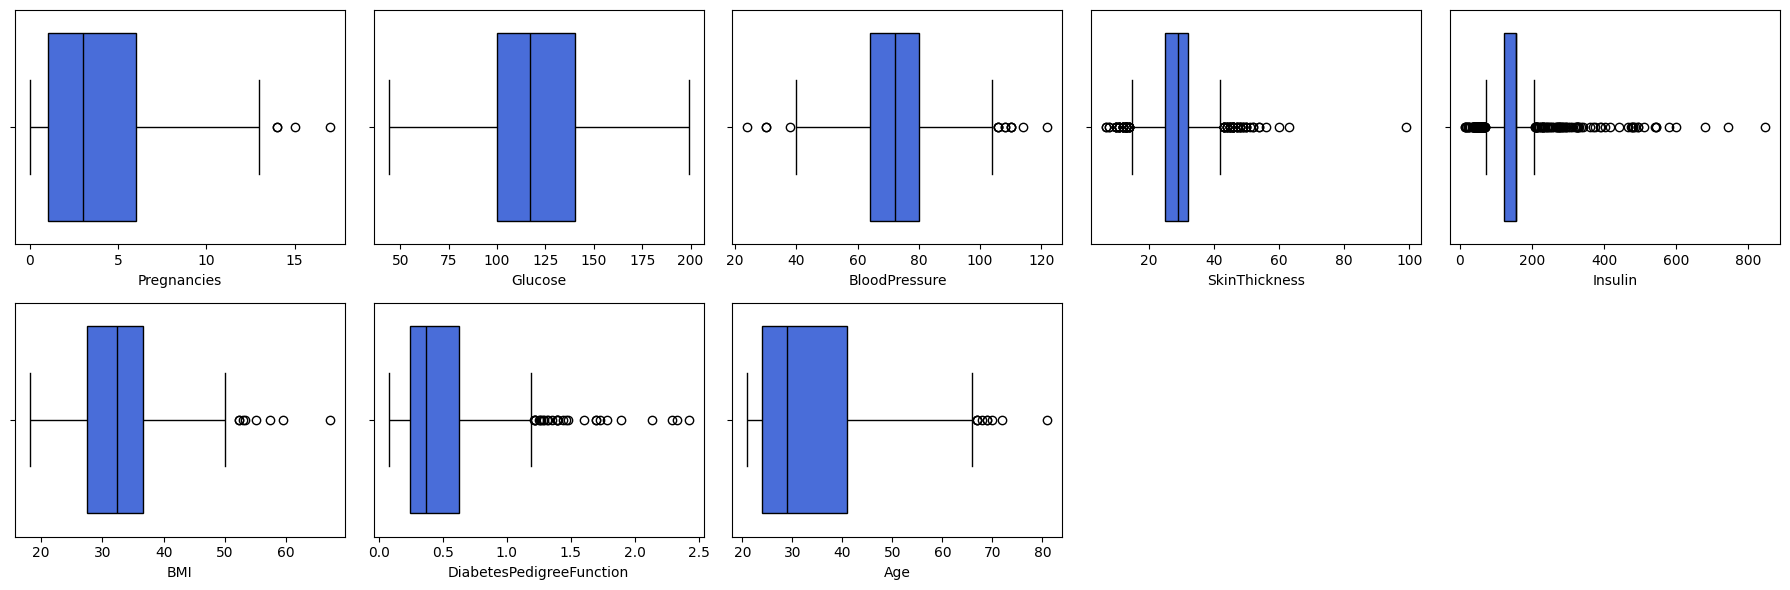

In [25]:
# Box-plot to Identify Outliers

nrows = 2
ncols = 5
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,6))
axes = ax.flatten()
for i in range(len(columns)):
    sns.boxplot(
        data=df,
        x=df[columns[i]],
        color='royalblue',
        linecolor='black',
        saturation=0.9,
        ax=axes[i]
    )
    
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [26]:
from sklearn import preprocessing

In [27]:
### Standardization (Z-score Normalization)
"""
Transforms data to have a mean of 0 and a standard deviation of 1.
Formula: X_scaled = (X - μ) / σ Where μ is the mean and σ is the standard deviation.
"""

for col in df.columns[:-3]:
    df[col] = preprocessing.scale(df[col], axis=0)

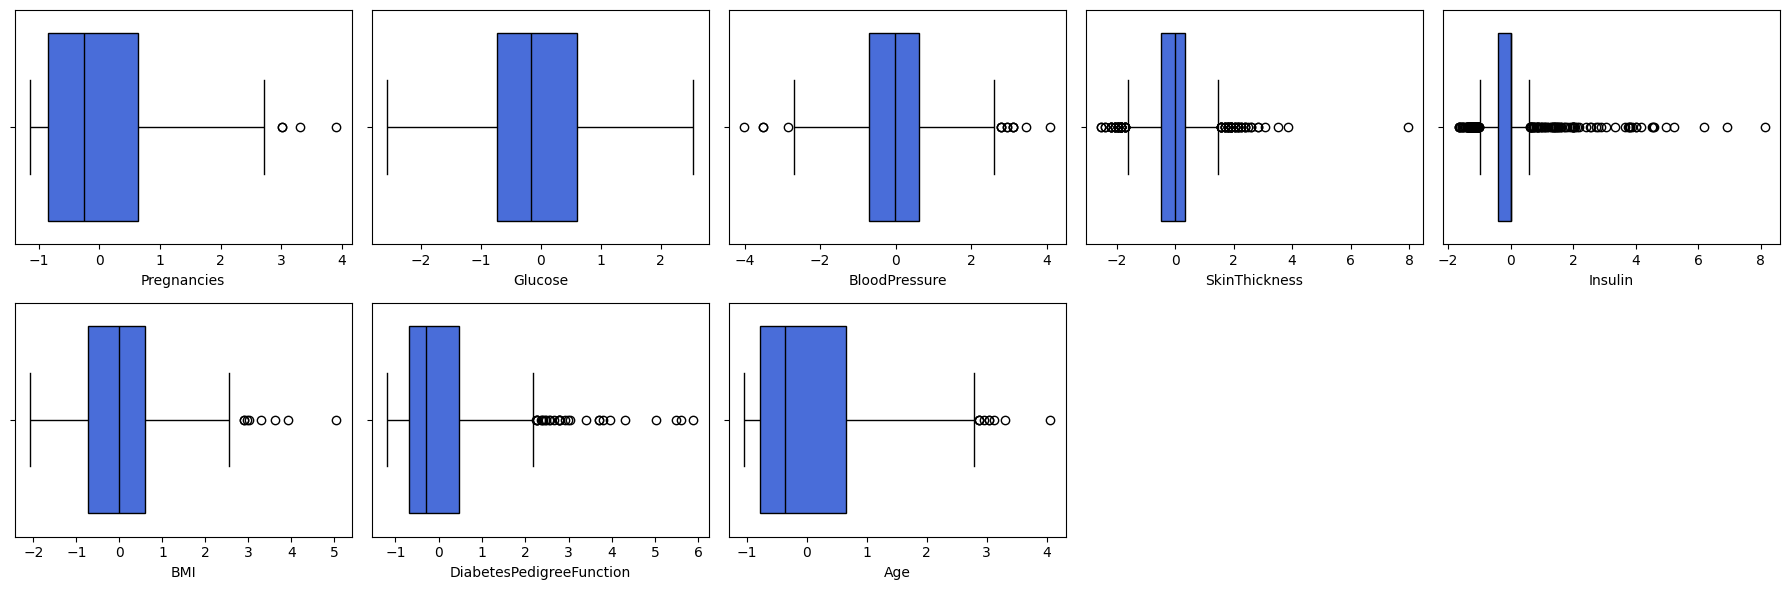

In [28]:
# Box-plot to Identify Outliers

nrows = 2
ncols = 5

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,6))
axes = ax.flatten()
for i in range(len(df.columns[:-3])):
    sns.boxplot(
        data=df,
        x=df.columns[:-3][i],
        color='royalblue',
        linecolor='black',
        saturation=0.9,
        ax=axes[i]
    )
    
for j in range(len(df.columns[:-3]), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [29]:
# Mean and Standard Deviation after Standardization

description_df = df.describe()
description_df.iloc[0:3, :-1].style.background_gradient(cmap='Blues').format(precision=2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [30]:
# Count of Outliers after Standardization (> 3)

outlier_count = [(col, int((df[col] > 3).sum())) for col in df.columns[:-3]]
outlier_df = pd.DataFrame(list(outlier_count), columns=['Feature', 'Outlier Count'])
outlier_df.style

,Feature,Outlier Count
0,Pregnancies,4
1,Glucose,0
2,BloodPressure,5
3,SkinThickness,4
4,Insulin,19
5,BMI,5
6,DiabetesPedigreeFunction,11
7,Age,5


In [31]:
# List of indices of Outliers

list_outlier_indices = df[(df.iloc[:, :-3] > 3).any(axis=1)].index 
# any(axis=1) 
# axis=1, evaluate each Row individually.
# axis=0, evaluate along the Columns.

print(list_outlier_indices)

Index([  4,   8,  13,  43,  45,  57,  58,  88, 106, 111, 120, 123, 125, 153,
       159, 177, 186, 220, 228, 247, 286, 298, 330, 370, 371, 392, 395, 409,
       415, 445, 453, 455, 459, 486, 549, 579, 584, 593, 621, 645, 655, 666,
       673, 684, 691, 695, 753],
      dtype='int64')


In [32]:
# Resetting row indices after dropping rows, use reset_index()
# The drop=True parameter in df.reset_index() is used to discard the old index rather than adding it as a new column in the DataFrame. 

df = df.drop(df[(df.iloc[:, :-3] > 3).any(axis=1)].index)

df = df.reset_index(drop=True)

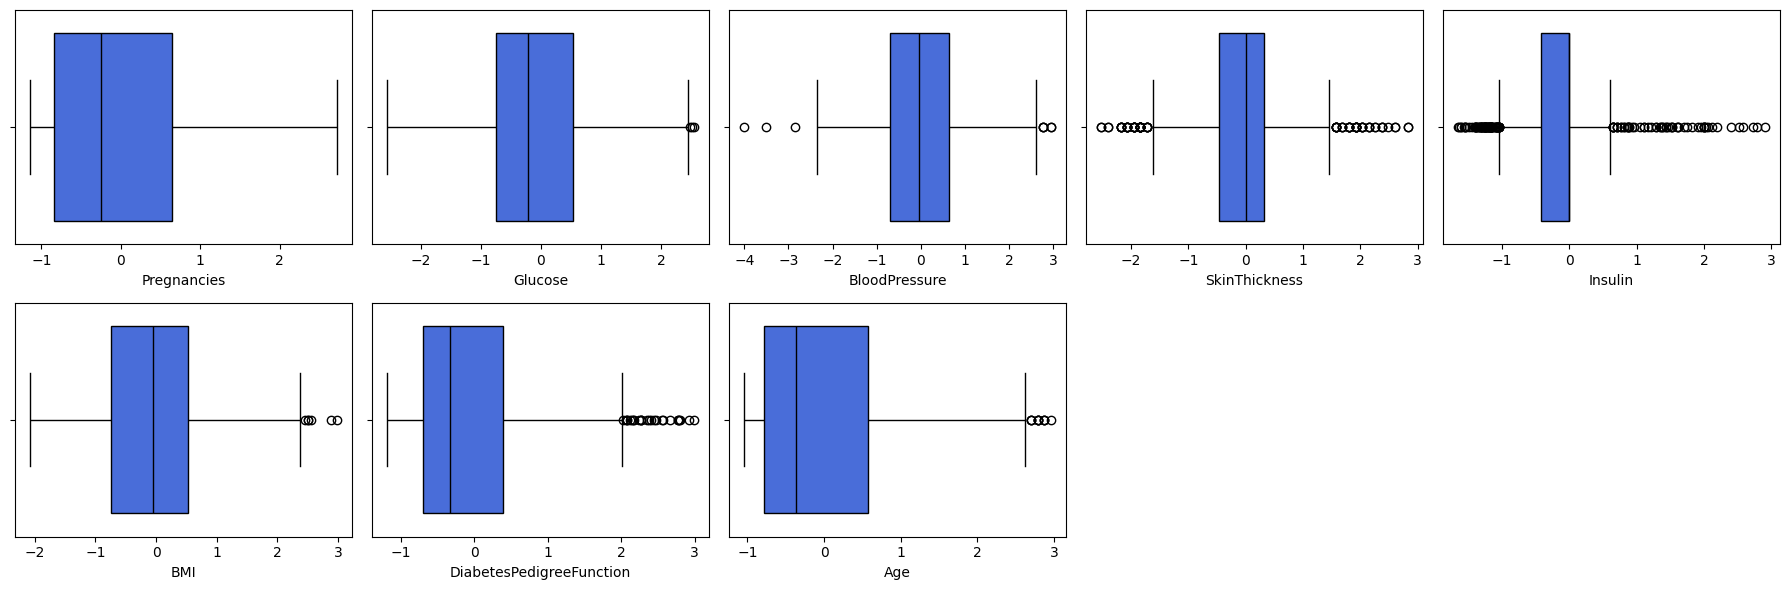

In [33]:
# Box-plot after standardization and removing of Outliers (> 3)

nrows = 2
ncols = 5

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,6))
axes = ax.flatten()
for i in range(len(df.columns[:-3])):
    sns.boxplot(
        data=df,
        x=df.columns[:-3][i],
        color='royalblue',
        linecolor='black',
        saturation=0.9,
        ax=axes[i]
    )
    
for j in range(len(df.columns[:-3]), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [34]:
# Identifying features with strong correlations to the target variable (Outcome).

correlation_matrix = df[df.columns[:-2]].corr()

correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)
correlation_with_target

Outcome                     1.000000
Glucose                     0.488527
BMI                         0.300806
Age                         0.246216
Insulin                     0.238708
Pregnancies                 0.219036
DiabetesPedigreeFunction    0.209656
SkinThickness               0.200449
BloodPressure               0.192612
Name: Outcome, dtype: float64

In [35]:
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]

print("Summary for Diabetic Group:")
diabetic.describe()


Summary for Diabetic Group:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,242.000000,242.000000,242.000000,2.420000e+02,2.420000e+02,242.000000,242.000000,242.000000,242.0
mean,0.296350,0.613009,0.239087,2.178810e-01,1.104599e-01,0.354007,0.182492,0.304384,1.0
std,1.040752,0.960061,0.902605,7.977895e-01,6.062724e-01,0.873833,0.962230,0.893451,0.0
min,-1.141852,-1.436303,-2.018881,-2.521670e+00,-1.489403e+00,-1.391052,-1.159352,-1.041549,1.0
25%,-0.547919,-0.121211,-0.198965,8.087936e-16,-3.345079e-16,-0.237599,-0.615731,-0.360847,1.0
50%,0.342981,0.487019,0.131929,8.087936e-16,-3.345079e-16,0.231788,-0.081170,0.234767,1.0
75%,1.159639,1.358267,0.793716,6.655021e-01,5.317163e-03,0.828527,0.766729,0.830381,1.0
max,2.718712,2.541850,2.944527,2.486743e+00,2.782907e+00,2.975332,2.784923,2.872487,1.0


In [36]:

print("Summary for Non-Diabetic Group:")
non_diabetic.describe()


Summary for Non-Diabetic Group:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,479.000000,479.000000,479.000000,4.790000e+02,4.790000e+02,479.000000,479.000000,479.000000,479.0
mean,-0.154857,-0.394109,-0.150731,-1.760715e-01,-2.291137e-01,-0.246493,-0.196180,-0.196712,0.0
std,0.901485,0.789676,0.956975,9.623325e-01,6.756766e-01,0.913320,0.763012,0.951959,0.0
min,-1.141852,-2.554131,-4.004245,-2.521670e+00,-1.654175e+00,-2.075119,-1.189553,-1.041549,0.0
25%,-0.844885,-0.943143,-0.860753,-8.142565e-01,-7.243887e-01,-0.983523,-0.748616,-0.871374,0.0
50%,-0.547919,-0.482861,-0.198965,8.087936e-16,-3.345079e-16,-0.299456,-0.446604,-0.531023,0.0
75%,0.342981,0.076053,0.462823,1.532780e-01,-3.345079e-16,0.377334,0.225372,0.277311,0.0
max,2.718712,2.377464,2.944527,2.828226e+00,2.900602e+00,2.247601,2.987271,2.957575,0.0


In [37]:
# Saving the Cleaned Data

df.to_csv('pima_indians_diabetes_cleaned.csv', index=False)
print("Cleaned dataset saved as 'pima_indians_diabetes_cleaned.csv'")

Cleaned dataset saved as 'pima_indians_diabetes_cleaned.csv'
